In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import Perceptron
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
sns.set_palette('coolwarm')

C:\Users\Vinci\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
training_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [3]:
training_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
training_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [6]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [7]:
training_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
test_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [9]:
training_data.PassengerId.nunique()
# Saving the passengerId of test data.
passengerId = test_data['PassengerId']

In [10]:
training_data.drop(labels='PassengerId', axis=1, inplace=True)
test_data.drop(labels='PassengerId', axis=1, inplace=True)

In [11]:
training_data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


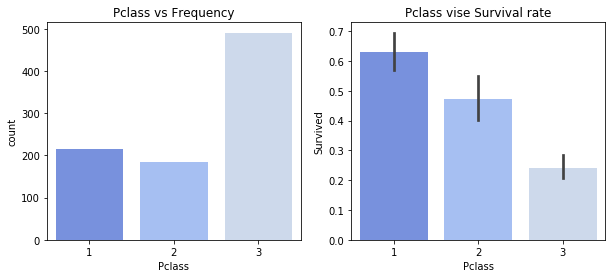

In [12]:
fx, axes = plt.subplots(1, 2, figsize=(10, 4))
axes[0].set_title("Pclass vs Frequency")
axes[1].set_title("Pclass vise Survival rate")
fig1_pclass = sns.countplot(data=training_data, x='Pclass', ax=axes[0])
fig2_pclass = sns.barplot(data=training_data, x='Pclass',y='Survived', ax=axes[1])

In [13]:
print(training_data[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean())

   Pclass  Survived
0       1  0.629630
1       2  0.472826
2       3  0.242363


In [14]:
training_data.Name.nunique()

891

In [15]:
# Title Feature

training_data['Title'] = training_data['Name'].apply(lambda x: x.split(',')[1]).apply(lambda x: x.split()[0])
test_data['Title'] = test_data['Name'].apply(lambda x: x.split(',')[1]).apply(lambda x: x.split()[0])

# Name Length
training_data['Name_Len'] = training_data['Name'].apply(lambda x: len(x))
test_data['Name_Len'] = test_data['Name'].apply(lambda x: len(x))

# Dropping the name features

training_data.drop(labels='Name', axis=1, inplace=True)
test_data.drop(labels='Name', axis=1, inplace=True)

In [16]:
# Dividing the name length by 10 for categorization

test_data.Name_Len = (test_data.Name_Len/10).astype(np.int64)+1
training_data.Name_Len = (training_data.Name_Len/10).astype(np.int64)+1

In [17]:
print (training_data[['Title', 'Survived']].groupby(['Title'], as_index=False).mean())

        Title  Survived
0       Capt.  0.000000
1        Col.  0.500000
2        Don.  0.000000
3         Dr.  0.428571
4   Jonkheer.  0.000000
5       Lady.  1.000000
6      Major.  0.500000
7     Master.  0.575000
8       Miss.  0.697802
9       Mlle.  1.000000
10       Mme.  1.000000
11        Mr.  0.156673
12       Mrs.  0.792000
13        Ms.  1.000000
14       Rev.  0.000000
15       Sir.  1.000000
16        the  1.000000


In [18]:
print (training_data[['Name_Len', 'Survived']].groupby(['Name_Len'], as_index=False).mean())

   Name_Len  Survived
0         2  0.220588
1         3  0.331776
2         4  0.493827
3         5  0.750000
4         6  0.800000
5         7  1.000000
6         9  1.000000


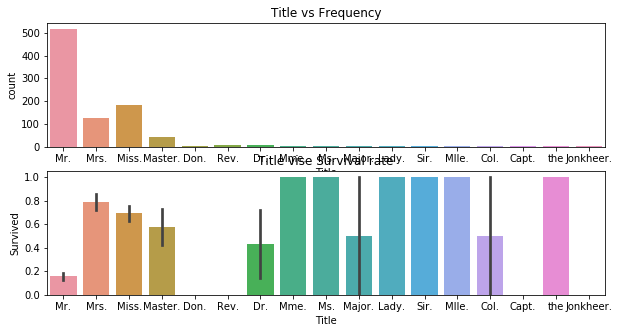

In [19]:
fx, axes = plt.subplots(2, 1, figsize=(10, 5))
axes[0].set_title("Title vs Frequency")
axes[1].set_title("Title vise Survival rate")
fig1_title = sns.countplot(data=training_data, x='Title', ax=axes[0])
fig2_title = sns.barplot(data=training_data, x='Title',y='Survived', ax=axes[1])

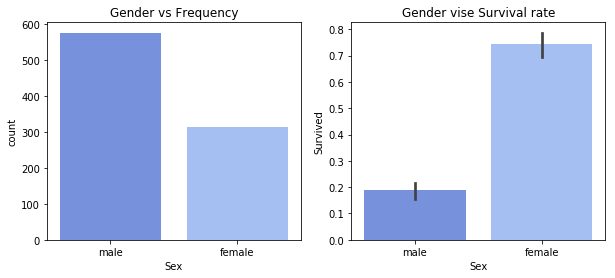

In [20]:
fx, axes = plt.subplots(1, 2, figsize=(10, 4))
axes[0].set_title("Gender vs Frequency")
axes[1].set_title("Gender vise Survival rate")
fig1_gen = sns.countplot(data=training_data, x='Sex', ax=axes[0])
fig2_gen = sns.barplot(data=training_data, x='Sex', y='Survived', ax=axes[1])

In [21]:
print(training_data[['Sex', 'Survived']].groupby(['Sex'], as_index = False).mean())

      Sex  Survived
0  female  0.742038
1    male  0.188908


In [22]:
training_data.Age.isnull().sum()
# Making a list of age values without null values
training_age_n = training_data.Age.dropna(axis=0)

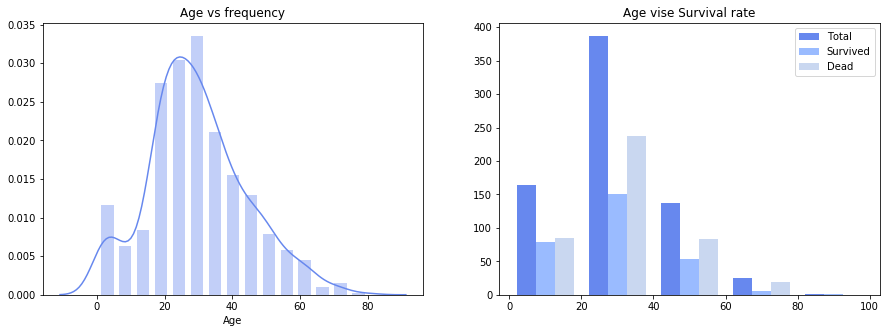

In [23]:
fx, axes = plt.subplots(1, 2, figsize=(15,5))
axes[0].set_title("Age vs frequency")
axes[1].set_title("Age vise Survival rate")
fig1_age = sns.distplot(a=training_age_n, bins=15, ax=axes[0], hist_kws={'rwidth':0.7})

# Creating a new list of survived and dead

pass_survived_age = training_data[training_data.Survived == 1].Age
pass_dead_age = training_data[training_data.Survived == 0].Age

axes[1].hist([training_data.Age, pass_survived_age, pass_dead_age], bins=5, range=(0, 100), label=['Total', 'Survived', 'Dead'])
axes[1].legend()
plt.show()

In [24]:
full_data = pd.concat([training_data, test_data])

In [25]:
# Null Ages in Training set (177 null values)
train_age_mean = full_data.Age.mean()
train_age_std = full_data.Age.std()
train_age_null = training_data.Age.isnull().sum()
rand_tr_age = np.random.randint(train_age_mean - train_age_std, train_age_mean + train_age_std, size=train_age_null)
training_data['Age'][np.isnan(training_data['Age'])] = rand_tr_age
training_data['Age'] = training_data['Age'].astype(int) + 1

# Null Ages in Test set (86 null values)
test_age_mean = full_data.Age.mean()
test_age_std = full_data.Age.std()
test_age_null = test_data.Age.isnull().sum()
rand_ts_age = np.random.randint(test_age_mean - test_age_std, test_age_mean + test_age_std, size=test_age_null)
test_data['Age'][np.isnan(test_data['Age'])] = rand_ts_age
test_data['Age'] = test_data['Age'].astype(int)

training_data.Age = (training_data.Age/15).astype(np.int64)
test_data.Age = (test_data.Age/15).astype(np.int64) + 1

In [26]:
print(training_data[['Age', 'Survived']].groupby(['Age'], as_index = False).mean())

   Age  Survived
0    0  0.591549
1    1  0.333333
2    2  0.404531
3    3  0.406250
4    4  0.230769
5    5  0.500000


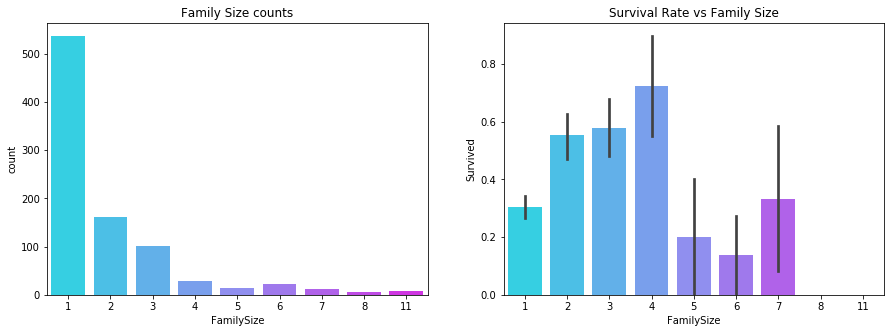

In [27]:
training_data['FamilySize'] = training_data['SibSp'] + training_data['Parch'] + 1
test_data['FamilySize'] = test_data['SibSp'] + test_data['Parch'] + 1
fx, axes = plt.subplots(1, 2, figsize=(15,5))
axes[0].set_title('Family Size counts')
axes[1].set_title('Survival Rate vs Family Size')
fig1_family = sns.countplot(x=training_data.FamilySize, ax=axes[0], palette='cool')
fig2_family = sns.barplot(x=training_data.FamilySize, y=training_data.Survived, ax=axes[1], palette='cool')

In [28]:
print(training_data[['FamilySize', 'Survived']].groupby(training_data['FamilySize'], as_index=False).mean())

   FamilySize  Survived
0         1.0  0.303538
1         2.0  0.552795
2         3.0  0.578431
3         4.0  0.724138
4         5.0  0.200000
5         6.0  0.136364
6         7.0  0.333333
7         8.0  0.000000
8        11.0  0.000000


In [29]:
# wheather or not the passenger was alone ?

training_data['isAlone'] = training_data['FamilySize'].map(lambda x: 1 if x == 1 else 0)
test_data['isAlone'] = test_data['FamilySize'].map(lambda x: 1 if x == 1 else 0)

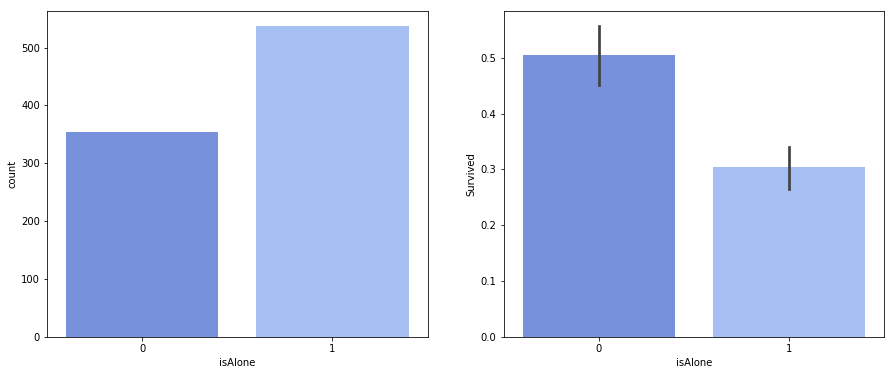

In [30]:
fx, axes = plt.subplots(1, 2, figsize=(15, 6))
fig1_alone = sns.countplot(data=training_data, x='isAlone', ax=axes[0])
fig2_alone = sns.barplot(data=training_data, x='isAlone', y='Survived', ax=axes[1])

In [31]:
training_data.drop(labels=['SibSp', 'Parch'], axis=1, inplace=True)
test_data.drop(labels=['SibSp', 'Parch'], axis=1, inplace=True)
training_data.head()

,Survived,Pclass,Sex,Age,Ticket,Fare,Cabin,Embarked,Title,Name_Len,FamilySize,isAlone
0,0,3,male,1,A/5 21171,7.2500,NaN,S,Mr.,3,2,0
1,1,1,female,2,PC 17599,71.2833,C85,C,Mrs.,6,2,0
2,1,3,female,1,STON/O2. 3101282,7.9250,NaN,S,Miss.,3,1,1
3,1,1,female,2,113803,53.1000,C123,S,Mrs.,5,2,0
4,0,3,male,2,373450,8.0500,NaN,S,Mr.,3,1,1


In [32]:
# Making a new feature ticket length

training_data['Ticket_Len'] = training_data['Ticket'].apply(lambda x: len(x))
test_data['Ticket_Len'] = test_data['Ticket'].apply(lambda x: len(x))

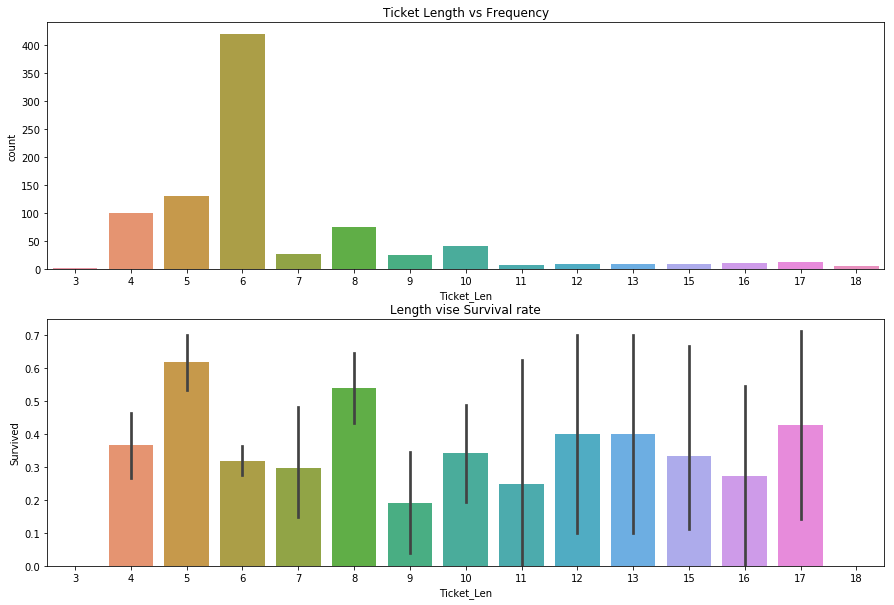

In [33]:
fx, axes = plt.subplots(2, 1, figsize=(15, 10))
axes[0].set_title("Ticket Length vs Frequency")
axes[1].set_title("Length vise Survival rate")
fig1_tlen = sns.countplot(data=training_data, x='Ticket_Len', ax=axes[0])
fig2_tlen = sns.barplot(data=training_data, x='Ticket_Len',y='Survived', ax=axes[1])

In [34]:
print(training_data[['Ticket_Len', 'Survived']].groupby(training_data['Ticket_Len'], as_index=False).mean())

    Ticket_Len  Survived
0          3.0  0.000000
1          4.0  0.366337
2          5.0  0.618321
3          6.0  0.319809
4          7.0  0.296296
5          8.0  0.539474
6          9.0  0.192308
7         10.0  0.341463
8         11.0  0.250000
9         12.0  0.400000
10        13.0  0.400000
11        15.0  0.333333
12        16.0  0.272727
13        17.0  0.428571
14        18.0  0.000000


In [35]:
training_data.drop(labels='Ticket', axis=1, inplace=True)
test_data.drop(labels='Ticket', axis=1, inplace=True)
training_data.head()

,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,Name_Len,FamilySize,isAlone,Ticket_Len
0,0,3,male,1,7.2500,NaN,S,Mr.,3,2,0,9
1,1,1,female,2,71.2833,C85,C,Mrs.,6,2,0,8
2,1,3,female,1,7.9250,NaN,S,Miss.,3,1,1,16
3,1,1,female,2,53.1000,C123,S,Mrs.,5,2,0,6
4,0,3,male,2,8.0500,NaN,S,Mr.,3,1,1,6


In [36]:
test_data.Fare.describe()
test_data['Fare'][np.isnan(test_data['Fare'])] = test_data.Fare.mean()

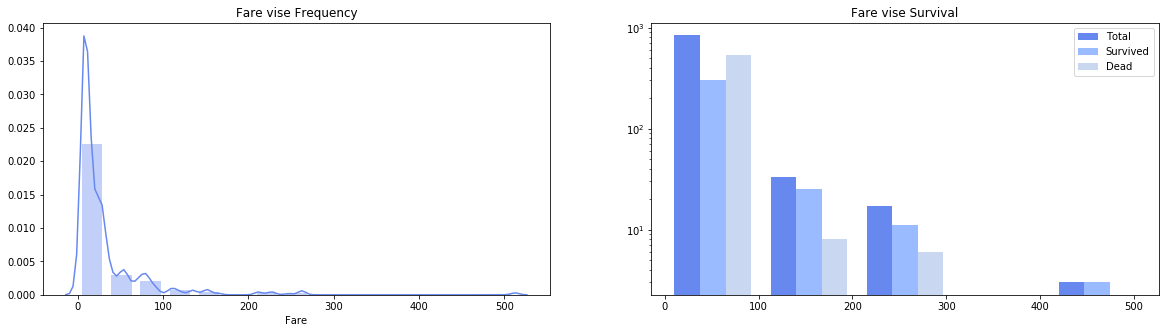

In [37]:
fx, axes = plt.subplots(1, 2, figsize=(20,5))
fig1_fare = sns.distplot(a=training_data.Fare, bins=15, ax=axes[0], hist_kws={'rwidth':0.7})
fig1_fare.set_title('Fare vise Frequency')

# Making a new list of survived and dead

pass_survived_fare = training_data[training_data.Survived == 1].Fare
pass_dead_fare = training_data[training_data.Survived == 0].Fare

axes[1].hist(x=[training_data.Fare, pass_survived_fare, pass_dead_fare], bins=5, label=['Total', 'Survived', 'Dead'], \
        log=True)
axes[1].legend()
axes[1].set_title('Fare vise Survival')
plt.show()

In [38]:
training_data.Fare = (training_data.Fare /20).astype(np.int64) + 1 
test_data.Fare = (test_data.Fare /20).astype(np.int64) + 1 

In [39]:
print(training_data[['Fare','Survived']].groupby(['Fare'], as_index = False).mean())

    Fare  Survived
0      1  0.277670
1      2  0.430000
2      3  0.574074
3      4  0.500000
4      5  0.869565
5      6  0.636364
6      7  0.909091
7      8  0.666667
8      9  1.000000
9     11  0.750000
10    12  0.600000
11    13  0.500000
12    14  0.666667
13    26  1.000000


In [40]:
training_data.head()

,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,Name_Len,FamilySize,isAlone,Ticket_Len
0,0,3,male,1,1,NaN,S,Mr.,3,2,0,9
1,1,1,female,2,4,C85,C,Mrs.,6,2,0,8
2,1,3,female,1,1,NaN,S,Miss.,3,1,1,16
3,1,1,female,2,3,C123,S,Mrs.,5,2,0,6
4,0,3,male,2,1,NaN,S,Mr.,3,1,1,6


In [41]:
# Null values in test data
cabin_null = float(test_data.Cabin.isnull().sum())
print(cabin_null/len(test_data) *100)

78.22966507177034


In [42]:
# Null values in training data
cabin_null = float(training_data.Cabin.isnull().sum())
print(cabin_null/len(training_data) *100)

77.10437710437711


In [43]:
# Making a new feature hasCabin which is 1 if cabin is available else 0
training_data['hasCabin'] = training_data.Cabin.notnull().astype(int)
test_data['hasCabin'] = test_data.Cabin.notnull().astype(int)

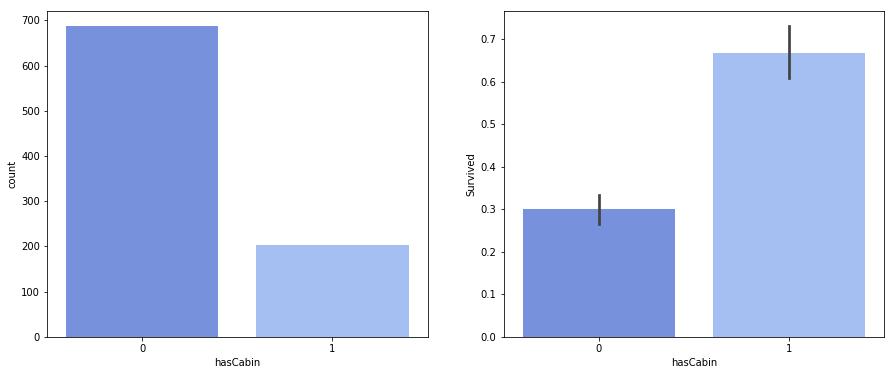

In [44]:
fx, axes = plt.subplots(1, 2, figsize=(15, 6))
fig1_hascabin = sns.countplot(data=training_data, x='hasCabin', ax=axes[0])
fig2_hascabin = sns.barplot(data=training_data, x='hasCabin', y='Survived', ax=axes[1])

In [45]:
training_data.drop(labels='Cabin', axis=1, inplace=True)
training_data.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,Name_Len,FamilySize,isAlone,Ticket_Len,hasCabin
0,0,3,male,1,1,S,Mr.,3,2,0,9,0
1,1,1,female,2,4,C,Mrs.,6,2,0,8,1
2,1,3,female,1,1,S,Miss.,3,1,1,16,0
3,1,1,female,2,3,S,Mrs.,5,2,0,6,1
4,0,3,male,2,1,S,Mr.,3,1,1,6,0


In [46]:
test_data.drop(labels='Cabin', axis=1, inplace=True)
test_data.head()

,Pclass,Sex,Age,Fare,Embarked,Title,Name_Len,FamilySize,isAlone,Ticket_Len,hasCabin
0,3,male,3,1,Q,Mr.,2,1,1,6,0
1,3,female,4,1,S,Mrs.,4,2,0,6,0
2,2,male,5,1,Q,Mr.,3,1,1,6,0
3,3,male,2,1,S,Mr.,2,1,1,6,0
4,3,female,2,1,S,Mrs.,5,3,0,7,0


In [47]:
training_data.Embarked.describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [48]:
training_data['Embarked'] = training_data['Embarked'].fillna('S')

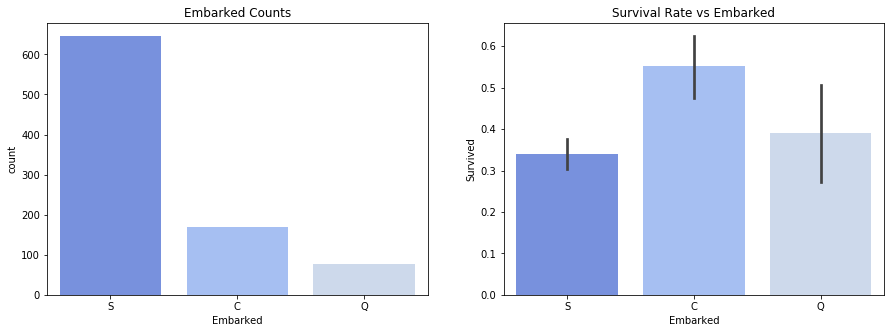

In [49]:
fx, axes = plt.subplots(1, 2, figsize=(15,5))
axes[0].set_title('Embarked Counts')
axes[1].set_title('Survival Rate vs Embarked')
fig1_embarked = sns.countplot(x=training_data.Embarked, ax=axes[0])
fig2_embarked = sns.barplot(x=training_data.Embarked, y=training_data.Survived, ax=axes[1])

In [50]:
print(training_data[['Embarked', 'Survived']].groupby(['Embarked'], as_index = False).mean())

  Embarked  Survived
0        C  0.553571
1        Q  0.389610
2        S  0.339009


In [51]:
print(training_data[['Embarked', 'Fare']].groupby(['Embarked'], as_index = False).mean())

  Embarked      Fare
0        C  3.470238
1        Q  1.233766
2        S  1.893189


In [52]:
# Splitting the dataset into dependent and independent features
training_data.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,Name_Len,FamilySize,isAlone,Ticket_Len,hasCabin
0,0,3,male,1,1,S,Mr.,3,2,0,9,0
1,1,1,female,2,4,C,Mrs.,6,2,0,8,1
2,1,3,female,1,1,S,Miss.,3,1,1,16,0
3,1,1,female,2,3,S,Mrs.,5,2,0,6,1
4,0,3,male,2,1,S,Mr.,3,1,1,6,0


In [53]:
X = training_data.iloc[:, 1:12].values
y = training_data.iloc[:, 0].values

In [54]:
# Resolving the categorical data for training set
label_encoder_sex_tr = LabelEncoder()
label_encoder_title_tr = LabelEncoder()
label_encoder_embarked_tr = LabelEncoder()
X[:, 1] = label_encoder_sex_tr.fit_transform(X[:, 1])
X[:, 5] = label_encoder_title_tr.fit_transform(X[:, 5])
X[:, 4] = label_encoder_embarked_tr.fit_transform(X[:, 4])

In [55]:
# Splitting the dataset into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.17)

In [56]:
# Feature Scaling

scaler_x = MinMaxScaler((-1,1))
X_train = scaler_x.fit_transform(X_train)
X_test = scaler_x.transform(X_test)

In [57]:
# Making a list of accuracies
accuracies = []

In [58]:
#Logistic Regression

In [59]:
classifier = Perceptron()
classifier.fit(X_train, y_train)

Perceptron(alpha=0.0001, class_weight=None, eta0=1.0, fit_intercept=True,
      max_iter=None, n_iter=None, n_jobs=1, penalty=None, random_state=0,
      shuffle=True, tol=None, verbose=0, warm_start=False)

In [60]:
lr_score = classifier.score(X_test, y_test)
accuracies.append(lr_score)
print(lr_score)

0.6842105263157895


In [61]:
#Kernel SVM

In [62]:
NB_classifier = GaussianNB()
NB_classifier.fit(X_train, y_train)

GaussianNB(priors=None)

In [63]:
NB_classifier_score = NB_classifier.score(X_test, y_test)
accuracies.append(NB_classifier_score)
print(NB_classifier_score)

0.6710526315789473


In [64]:
#Random Forest

In [65]:
rdmf = RandomForestClassifier(n_estimators=20, criterion='entropy')
rdmf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [66]:
rdmf_score = rdmf.score(X_test, y_test)
rdmf_score_tr = rdmf.score(X_train, y_train)
accuracies.append(rdmf_score)
print(rdmf_score)
print(rdmf_score_tr)

0.7697368421052632
0.945872801082544


In [67]:
myLabels = ['Perceptron', 'Naive Bayes', 'Random Forest']

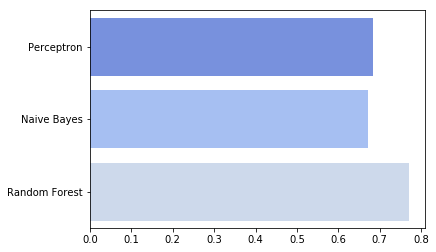

In [68]:
fig1_accu= sns.barplot(x=accuracies, y=myLabels, capsize=.2)

In [69]:
#Making the Prediction

In [70]:
# Preparing test data 
test_data['Title'] = test_data['Title'].replace('Dona.', 'Mrs.')
test_data.head()

,Pclass,Sex,Age,Fare,Embarked,Title,Name_Len,FamilySize,isAlone,Ticket_Len,hasCabin
0,3,male,3,1,Q,Mr.,2,1,1,6,0
1,3,female,4,1,S,Mrs.,4,2,0,6,0
2,2,male,5,1,Q,Mr.,3,1,1,6,0
3,3,male,2,1,S,Mr.,2,1,1,6,0
4,3,female,2,1,S,Mrs.,5,3,0,7,0


In [71]:
titanic_test = test_data.iloc[:, 0:11].values

In [72]:
# Resolving categorical data

titanic_test[:, 1] = label_encoder_sex_tr.transform(titanic_test[:, 1])
titanic_test[:, 5] = label_encoder_title_tr.transform(titanic_test[:, 5])
titanic_test[:, 4] = label_encoder_embarked_tr.transform(titanic_test[:, 4])

In [73]:
# Feature Scaling

titanic_test = scaler_x.transform(titanic_test)

In [74]:
y_pred = rdmf.predict(titanic_test)

In [75]:
len(y_pred)

418

In [76]:
titanic_submission = pd.DataFrame({'PassengerId':passengerId, 'Survived':y_pred})

In [77]:
titanic_submission.to_csv('Titanic_Problem_Submission.csv', index=False)